## Introduction


Nomenclator here: https://ec.europa.eu/eurostat/ramon/nomenclatures/index.cfm?TargetUrl=LST_NOM_DTL&IntCurrentPage=2&StrNom=CL_HHCOMP&IntPcKey=&StrLanguageCode=EN&StrLayoutCode=HIERARCHIC


F1_CH	 	Household composed of lone mother living with at least one child   
F1_YCH	 	Household composed of lone mother with at least one resident child under 25 years  
F1_OCH	 	Household composed of lone mother with at least one resident child 25 years or older  
P1_CH	 	Household composed of lone mother or father living with at least one child  
FAM_GE2	 	Household composed of two-or-more-family nucleus  
NFAM	 	Household composed of non-family nucleus  
P1	 	One-person household  
A1	 	Household composed of one adult  
A1_DCH	 	Household composed of one adult with dependent children  
A2	 	Household composed of two adults  
A2_DCH	 	Household composed of two adults with dependent children  
A_GE2_DCH	 	Household composed of two or more adults with dependent children  
A_GE3	 	Household composed of three or more adults  
A_GE3_DCH	 	Household composed of three or more adults with dependent children  
MULTI	 	Multiperson household other than family nucleus   
DCH	 	Households with dependent children  
NDCH	 	Households without dependent children  
A1_GE65	 	Household composed of one adult 65 years or over  
A2_GE1_GE65	 	Household composed of two adults, at least one aged 65 years or over  
OTH	 	Other  
NRP	 	No response  
UNK	 	Unknown  

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import folium
from folium.plugins import HeatMap, HeatMapWithTime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_df = pd.read_csv(os.path.join("..", "data", "data-europa-eu-euodp", "isoc_ci_it_h.tsv"), sep='\t')

In [3]:
data_df.shape

(12145, 18)

In [4]:
data_df.head()

,"indic_is,unit,hhtyp,geo\time",2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003
0,"H_BBFIX,PC_HH,A1,AL",:,33,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
1,"H_BBFIX,PC_HH,A1,AT",61,53,57,52,48,48,42,44,42,33,:,:,:,:,:,:,:
2,"H_BBFIX,PC_HH,A1,BA",55,40,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
3,"H_BBFIX,PC_HH,A1,BE",68,63 u,68,64,61,65,62,54,53,47,:,:,:,:,:,:,:
4,"H_BBFIX,PC_HH,A1,BG",32,35,38,32,29,29,29,27,17,12,:,:,:,:,:,:,:


In [5]:
data_df.columns

Index(['indic_is,unit,hhtyp,geo\time', '2019 ', '2018 ', '2017 ', '2016 ',
       '2015 ', '2014 ', '2013 ', '2012 ', '2011 ', '2010 ', '2009 ', '2008 ',
       '2007 ', '2006 ', '2005 ', '2004 ', '2003 '],
      dtype='object')

Note: the data does not contains recent information (2020). Still, it is relevant, since the status might be the same for 2020.

In [6]:
data_df.columns = ['composed', '2019', '2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','	2003']

In [7]:
data_df.head()

,composed,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,\t2003
0,"H_BBFIX,PC_HH,A1,AL",:,33,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
1,"H_BBFIX,PC_HH,A1,AT",61,53,57,52,48,48,42,44,42,33,:,:,:,:,:,:,:
2,"H_BBFIX,PC_HH,A1,BA",55,40,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
3,"H_BBFIX,PC_HH,A1,BE",68,63 u,68,64,61,65,62,54,53,47,:,:,:,:,:,:,:
4,"H_BBFIX,PC_HH,A1,BG",32,35,38,32,29,29,29,27,17,12,:,:,:,:,:,:,:


In [8]:
data_df['country'] = data_df['composed'].apply(lambda x: x.split(",")[-1])
data_df['household_type'] = data_df['composed'].apply(lambda x: x.split(",")[-2])
data_df['C1'] = data_df['composed'].apply(lambda x: x.split(",")[0])
data_df['C2'] = data_df['composed'].apply(lambda x: x.split(",")[1])

In [9]:
data_df.head()

,composed,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2008,2007,2006,2005,2004,\t2003,country,household_type,C1,C2
0,"H_BBFIX,PC_HH,A1,AL",:,33,:,:,:,:,:,:,:,...,:,:,:,:,:,:,AL,A1,H_BBFIX,PC_HH
1,"H_BBFIX,PC_HH,A1,AT",61,53,57,52,48,48,42,44,42,...,:,:,:,:,:,:,AT,A1,H_BBFIX,PC_HH
2,"H_BBFIX,PC_HH,A1,BA",55,40,:,:,:,:,:,:,:,...,:,:,:,:,:,:,BA,A1,H_BBFIX,PC_HH
3,"H_BBFIX,PC_HH,A1,BE",68,63 u,68,64,61,65,62,54,53,...,:,:,:,:,:,:,BE,A1,H_BBFIX,PC_HH
4,"H_BBFIX,PC_HH,A1,BG",32,35,38,32,29,29,29,27,17,...,:,:,:,:,:,:,BG,A1,H_BBFIX,PC_HH


In [10]:
data_df.country.unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA',
       'EE', 'EL', 'ES', 'EU15', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME',
       'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK',
       'TR', 'UK', 'XK', 'CA', 'KR', 'US'], dtype=object)

In [11]:
data_df.household_type.unique()

array(['A1', 'A1_DCH', 'A2', 'A2_DCH', 'ALL_DCH', 'ALL_NDCH', 'A_GE3',
       'A_GE3_DCH', 'HHI_Q1', 'HHI_Q2', 'HHI_Q3', 'HHI_Q4', 'HH_DEG1',
       'HH_DEG2', 'HH_DEG3', 'HH_NO1', 'HH_O1', 'TOTAL'], dtype=object)

Filter for A2_DCH (2 adults and dependent children)

In [12]:
a2_dch_data_df = data_df.loc[(data_df.household_type=="A2_DCH") & (data_df.C1=="H_BBFIX") & (data_df.C2=="PC_HH")]

In [13]:
a2_dch_data_df.shape

(44, 22)

In [14]:
a2_dch_data_df.head(44)

,composed,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2008,2007,2006,2005,2004,\t2003,country,household_type,C1,C2
132,"H_BBFIX,PC_HH,A2_DCH,AL",:,38,:,:,:,:,:,:,:,...,:,:,:,:,:,:,AL,A2_DCH,H_BBFIX,PC_HH
133,"H_BBFIX,PC_HH,A2_DCH,AT",83,83,84,81,82,82,75,75,70,...,:,:,:,:,:,:,AT,A2_DCH,H_BBFIX,PC_HH
134,"H_BBFIX,PC_HH,A2_DCH,BA",77,75,:,:,:,:,:,:,:,...,:,:,:,:,:,:,BA,A2_DCH,H_BBFIX,PC_HH
135,"H_BBFIX,PC_HH,A2_DCH,BE",87,87 u,92,92,93,94,92,91,87,...,:,:,:,:,:,:,BE,A2_DCH,H_BBFIX,PC_HH
136,"H_BBFIX,PC_HH,A2_DCH,BG",79,78,83,81,84,79,76,74,62,...,:,:,:,:,:,:,BG,A2_DCH,H_BBFIX,PC_HH
137,"H_BBFIX,PC_HH,A2_DCH,CH",89,:,80 b,:,:,94,:,:,:,...,:,:,:,:,:,:,CH,A2_DCH,H_BBFIX,PC_HH
138,"H_BBFIX,PC_HH,A2_DCH,CY",97,96,90,92,88,87,81,76,73,...,:,:,:,:,:,:,CY,A2_DCH,H_BBFIX,PC_HH
139,"H_BBFIX,PC_HH,A2_DCH,CZ",84,87,85,83,91,92,85,84,80,...,:,:,:,:,:,:,CZ,A2_DCH,H_BBFIX,PC_HH
140,"H_BBFIX,PC_HH,A2_DCH,DE",97,96,98,96,96,96,95,95,92,...,:,:,:,:,:,:,DE,A2_DCH,H_BBFIX,PC_HH
141,"H_BBFIX,PC_HH,A2_DCH,DK",93,91,92,90,90,89,90,90,91,...,:,:,:,:,:,:,DK,A2_DCH,H_BBFIX,PC_HH


In [15]:
import re
a2_dch_data_df['2019'] = a2_dch_data_df['2019'].apply(lambda x: re.sub(r"[azAZ: ]", "", x))
a2_dch_data_df['2019'] = a2_dch_data_df['2019'].apply(lambda x: x.replace(" ",""))
a2_dch_data_df = a2_dch_data_df.loc[~(a2_dch_data_df['2019'].isin(["", "97b"]))]
a2_dch_data_df['2019'] = a2_dch_data_df['2019'].apply(lambda x: int(x))

In [16]:
print(list(a2_dch_data_df['2019']))

[83, 77, 87, 79, 89, 97, 84, 97, 93, 87, 93, 91, 89, 85, 88, 64, 82, 87, 94, 87, 96, 72, 85, 96, 76, 80, 86, 97, 99, 98, 74, 91, 78, 94, 93, 87, 99, 87]


In [17]:
def plot_count(feature, value, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(df[feature][0:45], df[value][0:30], palette='Set3')
    g.set_title("Number of {} - first 30 by number".format(title))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()    

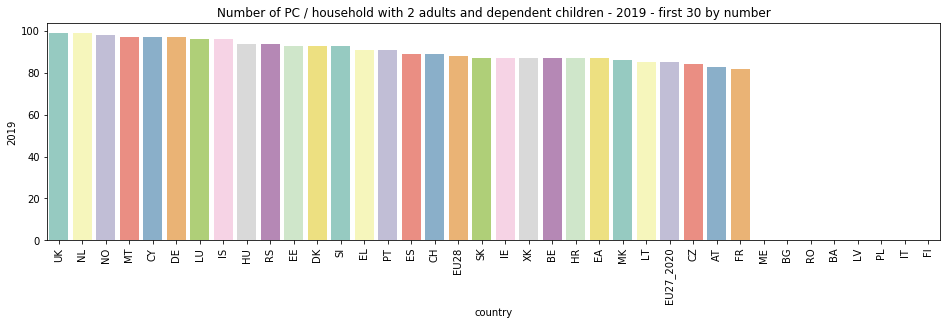

In [18]:
plot_count("country", "2019", "PC / household with 2 adults and dependent children - 2019", a2_dch_data_df, size=4)